In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import random
import re
import warnings
import time
import matplotlib.pyplot as plt
import seaborn as sns
import folium #mapas
from folium import plugins 
import geocoder  
import ipywidgets 
from branca.element import Figure

In [97]:
#Aquisition from wikipedia made via colab
rockefeller = pd.read_csv('data/rockefeller.csv')
vatican = pd.read_csv('data/vatican.csv')
capitol = pd.read_csv('data/capitol.csv')

In [16]:
#Wrangling
rockefeller.isnull().sum()

Year               0
Location grown     5
State              5
Species            0
Height (ft)        0
Height (m)         0
Notes             26
dtype: int64

In [18]:
rockefeller.drop(['Notes'], axis=1, inplace=True)
rockefeller

,Year,Location grown,State,Species,Height (ft),Height (m)
0,1931,NaN,NaN,Balsam fir,20,6.1
1,1933,NaN,NaN,Balsam fir,50,15.0
2,1934,Babylon,New York,Norway spruce,70,21.0
3,1935,NaN,NaN,Norway spruce,80,24.0
4,1936,Morristown,New Jersey,Norway spruce,70,21.0
5,1937,Smithfield,Rhode Island,Norway spruce,70,21.0
6,1938,NaN,NaN,Norway spruce,70,21.0
7,1939,Town Unknown,New Jersey,Norway spruce,75,23.0
8,1940,Hyde Park,New York,Norway spruce,88,27.0
9,1941,NaN,NaN,Norway spruce,83,25.0


In [98]:
vatican

,Year,Location grown at,Country,Species,Height (ft),Height (m),Notes
0,1982,Alban Hills,Italy,Fir,NaN,NaN,NaN
1,1983,Tyrol,Austria,NaN,NaN,NaN,NaN
2,1984,Waldmünchen,Germany,NaN,NaN,NaN,NaN
3,1985,South Tyrol,Italy,NaN,NaN,NaN,NaN
4,1986,Toblach,Italy,NaN,NaN,NaN,NaN
5,1987,Carinthia,Austria,NaN,NaN,NaN,NaN
6,1988,Cadore,Italy,NaN,NaN,NaN,NaN
7,1989,Schärding,Austria,NaN,NaN,NaN,NaN
8,1990,Ponte di Legno,Italy,NaN,NaN,NaN,NaN
9,1991,Vorarlberg,Austria,NaN,NaN,NaN,NaN


In [28]:
capitol

,Year,Location grown,State,Species,Height (ft),Height (m)
0,1963,Birdsboro,Pennsylvania,Douglas Fir,24,7.3
1,1964,Birdsboro,Pennsylvania,Douglas Fir,24,7.3
2,1965,Birdsboro,Pennsylvania,Douglas Fir,24,7.3
3,1966,Birdsboro,Pennsylvania,Douglas Fir,24,7.3
4,1967,Birdsboro,Pennsylvania,Douglas Fir,24,7.3
5,1968,Finksburg,Maryland,White Pine,30,9.1
6,1969,Westminster,Maryland,White Pine,40,12.0
7,1970,Monongahela National Forest,West Virginia,Norway Spruce,40,12.0
8,1971,White Mountain National Forest,New Hampshire,Black Spruce,45,14.0
9,1972,Cherokee National Forest,Tennessee,Balsam Fir,50,15.0


In [29]:
#Analysis
rockefeller.describe()

,Year,Height (ft),Height (m)
count,90.000000,90.000000,90.000000
mean,1977.366667,72.177778,22.001111
std,26.332553,10.867515,3.316303
min,1931.000000,20.000000,6.100000
25%,1955.250000,65.000000,20.000000
50%,1977.500000,74.000000,23.000000
75%,1999.750000,78.750000,24.000000
max,2022.000000,100.000000,30.000000


In [66]:
rockefeller.iloc[rockefeller['Height (m)'].idxmax()]

Year                       1999
Location grown     Killingworth
State               Connecticut
Species           Norway spruce
Height (ft)                 100
Height (m)                   30
Name: 66, dtype: object

In [64]:
rockefeller.groupby('Species').describe()


Height (ft)                                                 \
                    count       mean        std   min    25%   50%   75%   
Species                                                                    
Balsam fir            6.0  54.833333  18.389308  20.0  52.25  62.0  65.0   
Norman spruce         1.0  55.000000        NaN  55.0  55.00  55.0  55.0   
Norway spruce        73.0  74.945205   8.704868  50.0  70.00  75.0  80.0   
White spruce         10.0  64.100000   2.424413  60.0  64.00  64.5  65.0   

                     Height (m)              ...                Year  \
                 max      count       mean   ...     75%   max count   
Species                                      ...                       
Balsam fir      70.0        6.0  16.683333   ...    20.0  21.0   6.0   
Norman spruce   55.0        1.0  17.000000   ...    17.0  17.0   1.0   
Norway spruce  100.0       73.0  22.835616   ...    24.0  30.0  73.0   
White spruce    67.0       10.0  19.600000   ...    20.0  20.0  10.0   

                                                                               
                      mean        std     min     25%     50%     75%     max  
Species                                                                        
Balsam fir     1957.666667  20.066556  1931.0  1941.5  1968.0  1970.5  1975.0  
Norman spruce  1945.000000        NaN  1945.0  1945.0  1945.0  1945.0  1945.0  
Norway spruce  1980.835616  27.303853  1934.0  1954.0  1986.0  2004.0  2022.0  
White spruce   1967.100000   8.912538  1956.0  1959.0  1967.0  1974.5  1981.0  

[4 rows x 24 columns]

In [104]:
rockefeller.groupby('Species', 'Height (m)').count()

ValueError: No axis named Height (m) for object type <class 'pandas.core.frame.DataFrame'>

Text(-80,-20,'Source: Wikipedia')

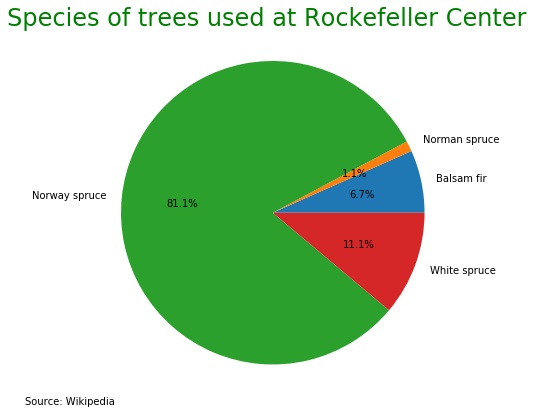

In [89]:
labels = ['Balsam fir', 'Norman spruce', 'Norway spruce', 'White spruce']
sizes = [6,1,73,10]
explode = (0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=360)
ax1.axis('equal')
fig1.suptitle('Species of trees used at Rockefeller Center', fontsize=24, color='g')
plt.annotate('Source: Wikipedia', (0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')

In [63]:
rockefeller.groupby('State').describe()

Height (ft)                                                  \
                    count       mean        std   min    25%   50%    75%   
State                                                                       
Connecticut          10.0  78.200000  12.345039  59.0  75.25  77.5  84.75   
Maine                 3.0  65.333333   1.527525  64.0  64.50  65.0  66.00   
Maryland              1.0  79.000000        NaN  79.0  79.00  79.0  79.00   
Massachusetts         1.0  70.000000        NaN  70.0  70.00  70.0  70.00   
New Hampshire         1.0  64.000000        NaN  64.0  64.00  64.0  64.00   
New Jersey           20.0  72.650000   5.788146  65.0  68.75  74.5  75.00   
New York             34.0  73.705882  10.311892  50.0  65.75  74.5  81.50   
Ohio                  1.0  75.000000        NaN  75.0  75.00  75.0  75.00   
Ontario               1.0  64.000000        NaN  64.0  64.00  64.0  64.00   
Pennsylvania          6.0  75.333333   7.339391  63.0  74.25  75.0  78.75   
Rhode Island          1.0  70.000000        NaN  70.0  70.00  70.0  70.00   
Vermont               6.0  63.666667   2.943920  60.0  61.25  65.0  65.00   

                     Height (m)              ...                 Year  \
                 max      count       mean   ...      75%   max count   
State                                        ...                        
Connecticut    100.0       10.0  23.800000   ...    26.00  30.0  10.0   
Maine           67.0        3.0  20.000000   ...    20.00  20.0   3.0   
Maryland        79.0        1.0  24.000000   ...    24.00  24.0   1.0   
Massachusetts   70.0        1.0  21.000000   ...    21.00  21.0   1.0   
New Hampshire   64.0        1.0  20.000000   ...    20.00  20.0   1.0   
New Jersey      85.0       20.0  22.200000   ...    23.00  26.0  20.0   
New York        94.0       34.0  22.470588   ...    24.75  29.0  34.0   
Ohio            75.0        1.0  23.000000   ...    23.00  23.0   1.0   
Ontario         64.0        1.0  20.000000   ...    20.00  20.0   1.0   
Pennsylvania    85.0        6.0  23.000000   ...    23.75  26.0   6.0   
Rhode Island    70.0        1.0  21.000000   ...    21.00  21.0   1.0   
Vermont         67.0        6.0  19.333333   ...    20.00  20.0   6.0   

                                                                         \
                      mean        std     min      25%     50%      75%   
State                                                                     
Connecticut    1996.100000  15.559563  1965.0  1991.00  2001.0  2006.75   
Maine          1965.666667  10.016653  1958.0  1960.00  1962.0  1969.50   
Maryland       2021.000000        NaN  2021.0  2021.00  2021.0  2021.00   
Massachusetts  1959.000000        NaN  1959.0  1959.00  1959.0  1959.00   
New Hampshire  1956.000000        NaN  1956.0  1956.00  1956.0  1956.00   
New Jersey     1977.250000  23.032871  1936.0  1954.75  1979.0  1996.50   
New York       1978.529412  28.330555  1934.0  1949.25  1984.5  1999.25   
Ohio           1998.000000        NaN  1998.0  1998.00  1998.0  1998.00   
Ontario        1966.000000        NaN  1966.0  1966.00  1966.0  1966.00   
Pennsylvania   1993.500000  23.889328  1960.0  1976.75  1998.0  2013.25   
Rhode Island   1937.000000        NaN  1937.0  1937.00  1937.0  1937.00   
Vermont        1969.000000   7.720104  1957.0  1967.25  1969.0  1970.75   

                       
                  max  
State                  
Connecticut    2013.0  
Maine          1977.0  
Maryland       2021.0  
Massachusetts  1959.0  
New Hampshire  1956.0  
New Jersey     2012.0  
New York       2022.0  
Ohio           1998.0  
Ontario        1966.0  
Pennsylvania   2017.0  
Rhode Island   1937.0  
Vermont        1981.0  

[12 rows x 24 columns]

In [99]:
vatican.describe()

,Year,Height (ft),Height (m)
count,40.000000,20.000000,20.000000
mean,2001.500000,93.950000,28.675000
std,11.690452,12.407447,3.781099
min,1982.000000,69.000000,21.000000
25%,1991.750000,82.000000,25.000000
50%,2001.500000,98.000000,30.000000
75%,2011.250000,105.500000,32.125000
max,2021.000000,110.000000,33.500000


In [100]:
vatican.iloc[vatican['Height (m)'].idxmax()]

Year                    2006
Location grown at    Taverna
Country                Italy
Species                  Fir
Height (ft)              110
Height (m)              33.5
Notes                    NaN
Name: 24, dtype: object

In [101]:
vatican.groupby('Species').describe()

Height (ft)                                                    \
                    count        mean        std   min    25%    50%    75%   
Species                                                                       
Fir                   7.0   97.000000  12.013881  82.0   87.0   98.0  107.5   
Norway Spruce         2.0  103.000000   7.071068  98.0  100.5  103.0  105.5   
Picea abies           1.0   92.000000        NaN  92.0   92.0   92.0   92.0   
Silver Fir            1.0   98.000000        NaN  98.0   98.0   98.0   98.0   
Spruce                9.0   89.333333  14.000000  69.0   82.0   85.0   98.0   

                     Height (m)              ...                 Year  \
                 max      count       mean   ...      75%   max count   
Species                                      ...                        
Fir            110.0        7.0  29.571429   ...    32.75  33.5   8.0   
Norway Spruce  108.0        2.0  31.500000   ...    32.25  33.0   2.0   
Picea abies     92.0        1.0  28.000000   ...    28.00  28.0   1.0   
Silver Fir      98.0        1.0  30.000000   ...    30.00  30.0   1.0   
Spruce         110.0        9.0  27.277778   ...    30.00  33.5   9.0   

                                                                                
                      mean       std     min      25%     50%      75%     max  
Species                                                                         
Fir            2004.125000  9.876921  1982.0  2003.50  2005.5  2008.50  2014.0  
Norway Spruce  2008.500000  0.707107  2008.0  2008.25  2008.5  2008.75  2009.0  
Picea abies    2021.000000       NaN  2021.0  2021.00  2021.0  2021.00  2021.0  
Silver Fir     2012.000000       NaN  2012.0  2012.00  2012.0  2012.00  2012.0  
Spruce         2014.333333  5.431390  2003.0  2011.00  2016.0  2018.00  2020.0  

[5 rows x 24 columns]

In [102]:
vatican.groupby('Species').count()

,Year,Location grown at,Country,Height (ft),Height (m),Notes
Species,,,,,,
Fir,8,8,8,7,7,4
Norway Spruce,2,2,2,2,2,2
Picea abies,1,1,1,1,1,1
Silver Fir,1,1,1,1,1,1
Spruce,9,9,9,9,9,9


Text(-80,-20,'Source: Wikipedia')

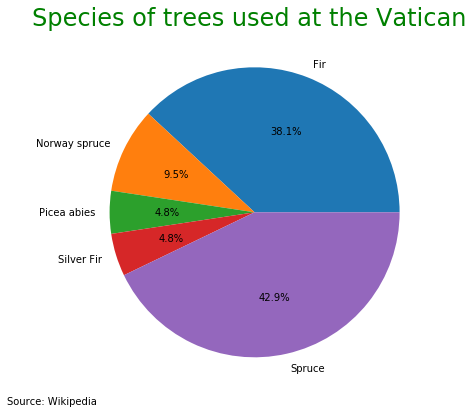

In [103]:
labels = ['Fir', 'Norway spruce', 'Picea abies', 'Silver Fir', 'Spruce']
sizes = [8,2,1,1,9]
explode = (0, 0, 0, 0,0)
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=360)
ax1.axis('equal')
fig1.suptitle('Species of trees used at the Vatican', fontsize=24, color='g')
plt.annotate('Source: Wikipedia', (0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')

In [61]:
vatican.groupby('Country').describe()

Height (ft)                                                 \
                     count   mean       std    min     25%    50%     75%   
Country                                                                     
Austria                2.0  108.0   0.00000  108.0  108.00  108.0  108.00   
Belgium                1.0   98.0       NaN   98.0   98.00   98.0   98.00   
Croatia                1.0   92.0       NaN   92.0   92.00   92.0   92.00   
Czech Republic         0.0    NaN       NaN    NaN     NaN    NaN     NaN   
Germany                2.0   82.0   0.00000   82.0   82.00   82.0   82.00   
Italy                 10.0   93.9  12.67938   75.0   82.75   95.0  104.75   
Poland                 1.0   69.0       NaN   69.0   69.00   69.0   69.00   
Romania                0.0    NaN       NaN    NaN     NaN    NaN     NaN   
Slovakia               0.0    NaN       NaN    NaN     NaN    NaN     NaN   
Slovenia               1.0   98.0       NaN   98.0   98.00   98.0   98.00   
Ukraine                1.0   98.0       NaN   98.0   98.00   98.0   98.00   
Valle D’Aosta          1.0  105.0       NaN  105.0  105.00  105.0  105.00   

                      Height (m)          ...                  Year            \
                  max      count   mean   ...       75%   max count      mean   
Country                                   ...                                   
Austria         108.0        2.0  33.00   ...    33.000  33.0   8.0  1994.500   
Belgium          98.0        1.0  30.00   ...    30.000  30.0   1.0  2009.000   
Croatia          92.0        1.0  28.00   ...    28.000  28.0   1.0  2002.000   
Czech Republic    NaN        0.0    NaN   ...       NaN   NaN   1.0  1999.000   
Germany          82.0        2.0  25.00   ...    25.000  25.0   5.0  2001.000   
Italy           110.0       10.0  28.65   ...    31.875  33.5  16.0  2003.125   
Poland           69.0        1.0  21.00   ...    21.000  21.0   2.0  2007.000   
Romania           NaN        0.0    NaN   ...       NaN   NaN   1.0  2001.000   
Slovakia          NaN        0.0    NaN   ...       NaN   NaN   1.0  1994.000   
Slovenia         98.0        1.0  30.00   ...    30.000  30.0   2.0  2008.000   
Ukraine          98.0        1.0  30.00   ...    30.000  30.0   1.0  2011.000   
Valle D’Aosta   105.0        1.0  32.00   ...    32.000  32.0   1.0  2003.000   

                                                                    
                      std     min     25%     50%      75%     max  
Country                                                             
Austria          8.912271  1983.0  1988.5  1992.0  2001.25  2008.0  
Belgium               NaN  2009.0  2009.0  2009.0  2009.00  2009.0  
Croatia               NaN  2002.0  2002.0  2002.0  2002.00  2002.0  
Czech Republic        NaN  1999.0  1999.0  1999.0  1999.00  1999.0  
Germany         12.980755  1984.0  1995.0  1998.0  2013.00  2015.0  
Italy           13.710701  1982.0  1989.5  2006.5  2014.50  2021.0  
Poland          14.142136  1997.0  2002.0  2007.0  2012.00  2017.0  
Romania               NaN  2001.0  2001.0  2001.0  2001.00  2001.0  
Slovakia              NaN  1994.0  1994.0  1994.0  1994.00  1994.0  
Slovenia        16.970563  1996.0  2002.0  2008.0  2014.00  2020.0  
Ukraine               NaN  2011.0  2011.0  2011.0  2011.00  2011.0  
Valle D’Aosta         NaN  2003.0  2003.0  2003.0  2003.00  2003.0  

[12 rows x 24 columns]

In [31]:
capitol.describe()

,Year,Height (ft),Height (m)
count,59.000000,59.000000,59.000000
mean,1992.000000,58.084746,17.671186
std,17.175564,16.909789,5.216487
min,1963.000000,24.000000,7.300000
25%,1977.500000,50.000000,15.000000
50%,1992.000000,60.000000,18.000000
75%,2006.500000,68.500000,20.500000
max,2021.000000,89.000000,27.000000
